# Visão Computacional 2023.2 - Lista 1

## Utilitários

In [96]:
# Implementando função para plotar imagens

import matplotlib.pyplot as plt


def plot_imgs(imgs, columns=2, as_gray=False) :
  num_images = len(imgs)
  num_rows = (num_images + 1) // columns

  fig, axes = plt.subplots(num_rows, columns, figsize=(10, 5 * num_rows))

  for i, ax in enumerate(axes.flat):
    if i < num_images:
      ax.imshow(imgs[i], cmap=('gray' if as_gray else None))
    else:
      ax.set_visible(False)

  plt.tight_layout()
  plt.show()

## Questão 1

Implemente uma função que receba uma imagem em formato PPM, o tamanho _n_ de um filtro espacial com dimensões _n x n_ e a matriz com os pesos do filtro, e aplique o filtro com uma convolução, gerando e salvando a imagem resultante no disco em formato PPM. Você não pode usar a OpenCV em nenhum desses passos. As especificações do formato PPM podem ser encontradas aqui: https://netpbm.sourceforge.net/doc/ppm.html

Implementando as funções para leitura e gravação de arquivos PPM (P6):

In [97]:
import numpy as np


def read_ppm_img(img_path):
  with open(img_path, 'rb') as file:
    line = file.readline()
    if not line.startswith(b'P6'):
      raise Exception("invalid image")

    width, height = map(int, file.readline().split())
    max_val = int(file.readline())
    pixels = np.fromfile(file, dtype=np.uint8).reshape(height, width, 3)

    return width, height, max_val, pixels


def save_ppm_img(img_path, width, height, max_val, pixels):
  with open(img_path, 'wb') as file:
    file.write(b'P6\n')
    file.write(f"{width} {height}\n".encode())
    file.write(f"{max_val}\n".encode())
    file.write(pixels.tobytes())

Implementando a função de convolução:

In [3]:
def apply_filter(img, kernel):
  img_height, img_width = img.shape[:2]
  kernel_height, kernel_width = kernel.shape

  is_colored = len(img.shape) == 3 and img.shape[2] == 3

  padding_height = kernel_height // 2
  padding_width = kernel_width // 2

  if is_colored:
    padded_image = np.pad(
        img,
        ((padding_height,padding_height), (padding_width,padding_width), (0,0)),
        mode='constant',
    )
    result = np.zeros_like(img)
  else:
    padded_image = np.pad(
        img,
        ((padding_height,padding_height), (padding_width,padding_width)),
        mode='constant',
    )
    result = np.zeros((img_height, img_width))

  for i in range(img_height):
    for j in range(img_width):
      if is_colored:
        result[i, j, 0] = np.sum(padded_image[i:i+kernel_height, j:j+kernel_width, 0] * kernel)
        result[i, j, 1] = np.sum(padded_image[i:i+kernel_height, j:j+kernel_width, 1] * kernel)
        result[i, j, 2] = np.sum(padded_image[i:i+kernel_height, j:j+kernel_width, 2] * kernel)
      else:
        result[i, j] = np.sum(padded_image[i:i+kernel_height, j:j+kernel_width] * kernel)

  return result

Aplicando um filtro de blur:

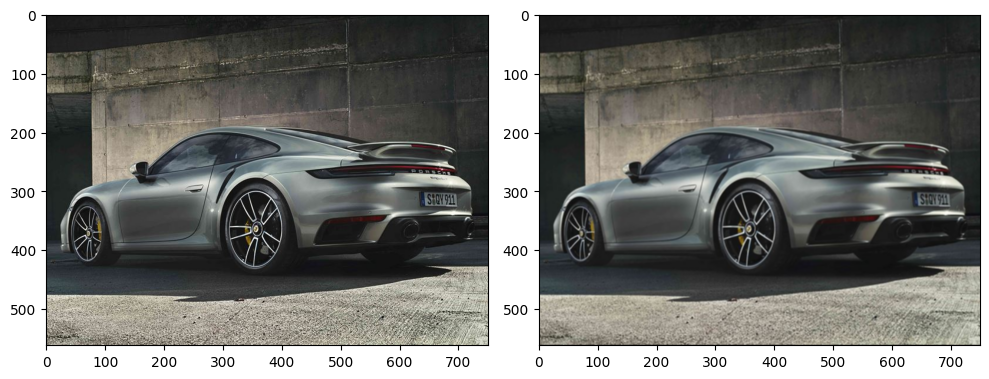

In [17]:
width, height, max_val, img = read_ppm_img('/content/drive/MyDrive/CV-2023.2/list-1/porsche.ppm')

blur_kernel = 1/9 * np.ones((3, 3), dtype=int)
blurred_img = apply_filter(img, blur_kernel)
plot_imgs([img, blurred_img])

save_ppm_img('/content/drive/MyDrive/CV-2023.2/list-1/porsche-blurred.ppm', width, height, max_val, blurred_img)

## Questão 2

Usando a função da questão 1, pesquise um filtro passa-alta e aplique-o em 3 imagens distintas, variando o valor de _n_ em 3 unidades em cada imagem. O que acontece quando _n_ cresce?

**Resposta:** O filtro aplicado em questão é o filtro Laplaciano, responsável por destacar regiões de rápida mudança de intensidade ao calcular a derivada de segunda ordem da imagem. Geralmente, os tamanhos de filtro são ímpar, portanto foram aplicados filtros Laplacianos 3x3, 5x5 e 7x7, e podemos observar que a medida que _n_ cresce, os contornos são mais acentuados porque a operação se torna cada vez mais sensível à alta frequência.

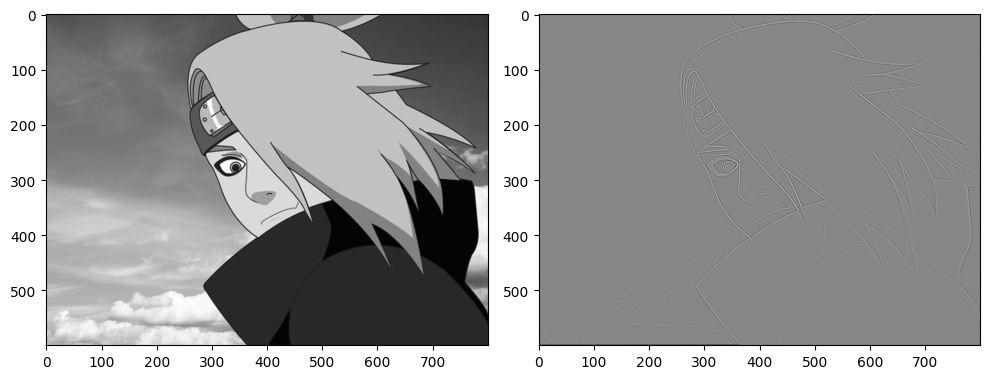

In [98]:
# Aplicando filtro passa-alta 3x3

import cv2 as cv


laplacian_kernel = np.array([
    [0,  1, 0],
    [1, -4, 1],
    [0,  1, 0],
])

img = cv.imread('/content/drive/MyDrive/CV-2023.2/list-1/deidara.jpg', cv.IMREAD_GRAYSCALE)
filtered = apply_filter(img, laplacian_kernel)
plot_imgs([img, filtered], as_gray=True)

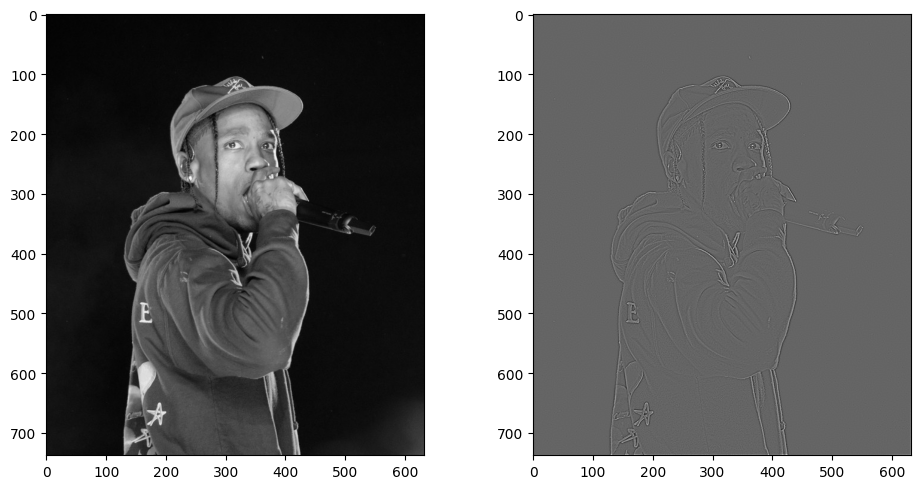

In [99]:
# Aplicando filtro passa-alta 5x5

laplacian_kernel = np.array([
    [ 0,  0, -1,  0,  0],
    [ 0, -1, -2, -1,  0],
    [-1, -2, 16, -2, -1],
    [ 0, -1, -2, -1,  0],
    [ 0,  0, -1,  0,  0]
])

img = cv.imread('/content/drive/MyDrive/CV-2023.2/list-1/travis_scott.jpg', cv.IMREAD_GRAYSCALE)
filtered = apply_filter(img, laplacian_kernel)
plot_imgs([img, filtered], as_gray=True)

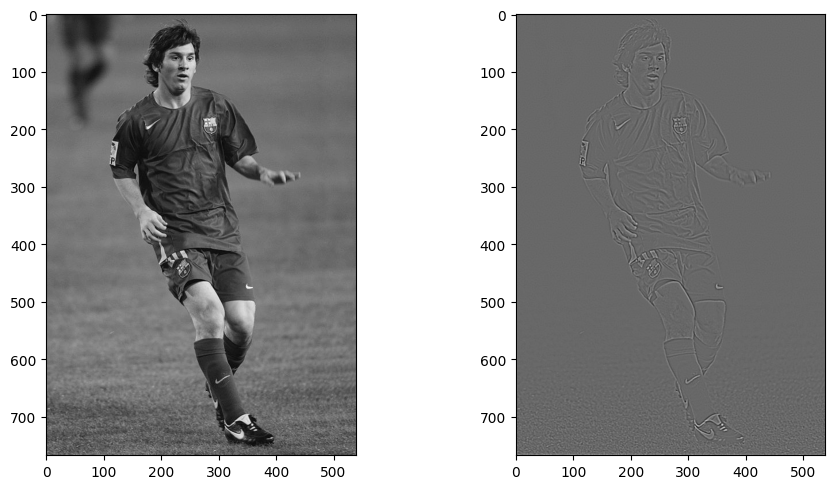

In [100]:
# Aplicando filtro passa-alta 7x7

laplacian_kernel = np.array([
    [ 0,  0, -1, -1, -1,  0,  0],
    [ 0, -1, -3, -3, -3, -1,  0],
    [-1, -3,  0,  7,  0, -3, -1],
    [-1, -3,  7, 24,  7, -3, -1],
    [-1, -3,  0,  7,  0, -3, -1],
    [ 0, -1, -3, -3, -3, -1,  0],
    [ 0,  0, -1, -1, -1,  0,  0],
])

img = cv.imread('/content/drive/MyDrive/CV-2023.2/list-1/messi.jpg', cv.IMREAD_GRAYSCALE)
filtered = apply_filter(img, laplacian_kernel)
plot_imgs([img, filtered], as_gray=True)

## Questão 3

Usando a função da questão 1, pesquise um filtro passa-baixa e aplique-o em 3 imagens distintas, variando o valor de _n_ em 3 unidades em cada imagem. O que acontece quando _n_ cresce?

**Resposta:** O filtro aplicado em questão é o filtro de Blur, responsável por atenuar as mudanças de intensidade da imagem ao calcular os novos pixeis como sendo a média dos pixels da janela do filtro, isto é, permitindo passagem de baixa frequência.

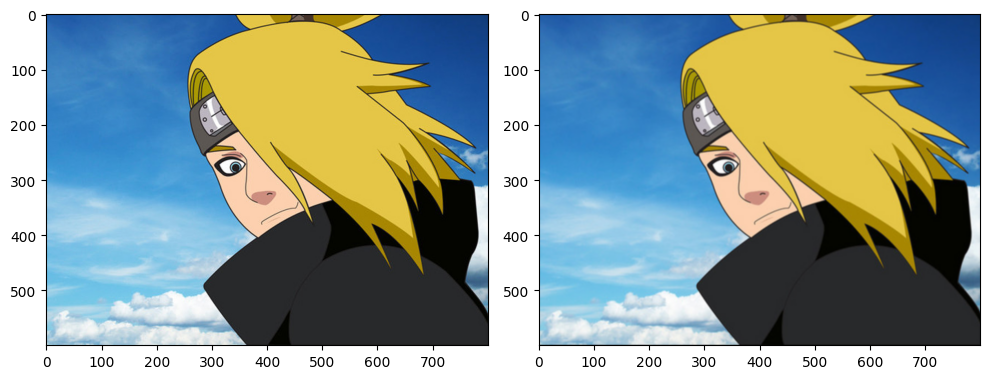

In [101]:
# Aplicando filtro passa-baixa 3x3

blur_kernel = 1/9 * np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],
])

read = cv.imread('/content/drive/MyDrive/CV-2023.2/list-1/deidara.jpg')
img = cv.cvtColor(read, cv.COLOR_BGR2RGB)
filtered = apply_filter(img, blur_kernel)
plot_imgs([img, filtered])

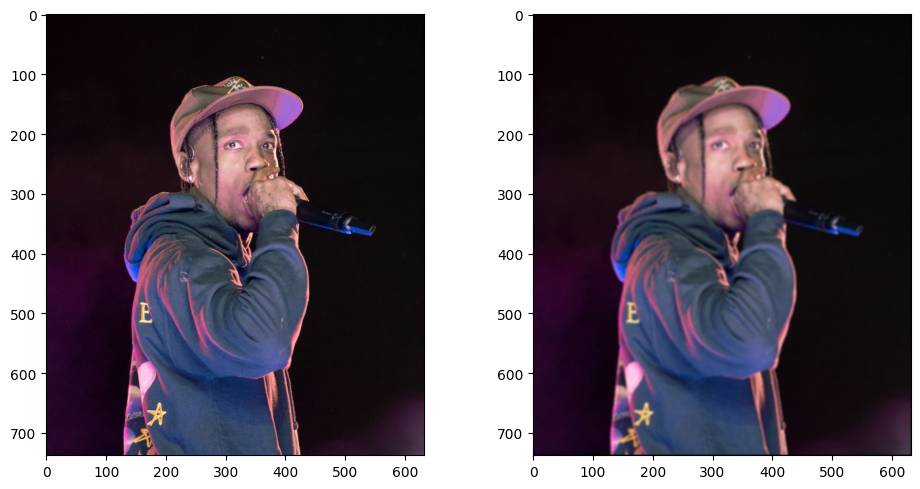

In [102]:
# Aplicando filtro passa-baixa 5x5

blur_kernel = 1/25 * np.array([
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
])

read = cv.imread('/content/drive/MyDrive/CV-2023.2/list-1/travis_scott.jpg')
img = cv.cvtColor(read, cv.COLOR_BGR2RGB)
filtered = apply_filter(img, blur_kernel)
plot_imgs([img, filtered])

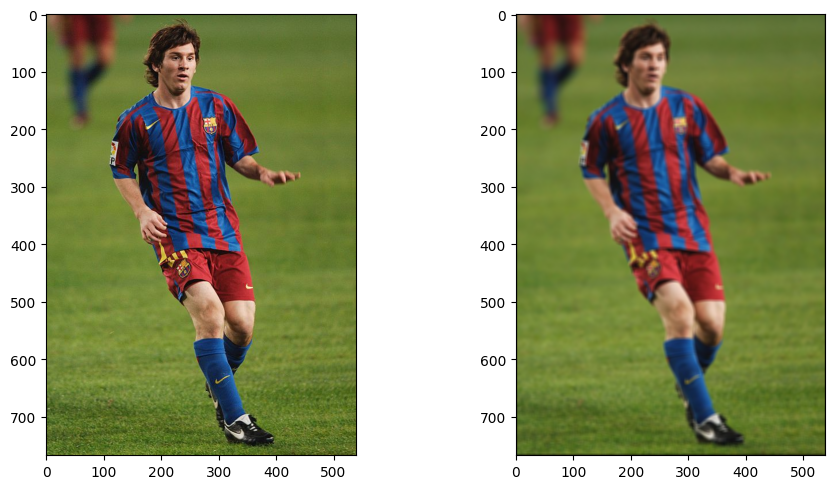

In [103]:
# Aplicando filtro passa-baixa 7x7

blur_kernel = 1/49 * np.array([
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
])

read = cv.imread('/content/drive/MyDrive/CV-2023.2/list-1/messi.jpg')
img = cv.cvtColor(read, cv.COLOR_BGR2RGB)
filtered = apply_filter(img, blur_kernel)
plot_imgs([img, filtered])

## Questão 4

Um filtro passa-baixa bastante conhecido é o filtro Gaussiano. Através de uma máscara determinada por um desvio padrão σ, é possível fazer o que chamamos de suavização gaussiana de uma imagem. Considere o filtro 5x5 de desvio padrão unitário _g_.

Crie uma imagem _I_ de dimensões 100x100 que contém um único valor não nulo localizado no centro da imagem. Utilizando o filtro gaussiano _g_, calcule e exiba _I * g_, onde _*_ é a notação para o operador de convolução.

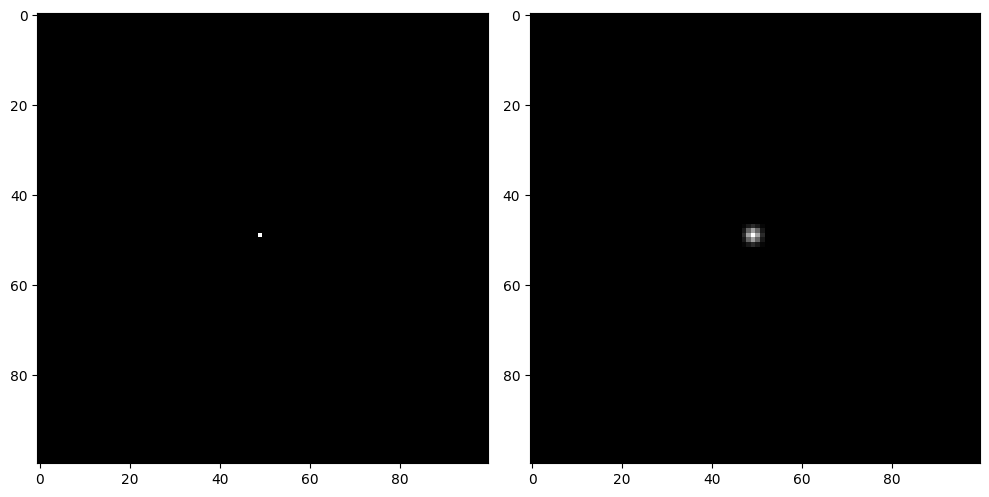

In [104]:
g = np.array([
  [1/273, 4/273,  7/273,  4/273,  1/273],
  [4/273, 16/273, 26/273, 16/273, 4/273],
  [7/273, 26/273, 41/273, 26/273, 7/273],
  [4/273, 16/273, 26/273, 16/273, 4/273],
  [1/273, 4/273,  7/273,  4/273,  1/273],
])

I = np.zeros((100, 100))
I[49, 49] = 255 # ponto central branco

filtered = apply_filter(I, g)
plot_imgs([I, filtered], as_gray=True)

## Questão 5

Pesquise e implemente um filtro para remoção de ruídos que não possa ser representado com convoluções.

**Resposta:** O filtro Median Blur, por exemplo, não é representado pelos cálculos de convolução, na verdade, como o nome sugere, os pixels da imagem filtrada são determinados a partir da mediana da janela do filtro.

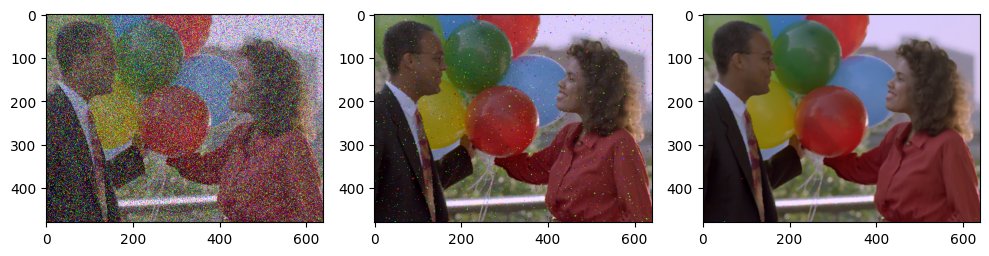

In [105]:
noisy_img = cv.cvtColor(cv.imread('/content/drive/MyDrive/CV-2023.2/list-1/noisy.png'), cv.COLOR_BGR2RGB)

filtered_1 = cv.medianBlur(noisy_img, ksize=3)
filtered_2 = cv.medianBlur(noisy_img, ksize=5)

plot_imgs([noisy_img, filtered_1, filtered_2], columns=3)

## Questão 6

Aplique o detector de canny usando a função _Canny()_ da OpenCV em uma ou mais imagens de sua escolha. Experimente variar cada um dos parâmetros _threshold1_, _threshold2_ e _apertureSize_. Explique com suas palavras a influência de cada parâmetro no resultado.

**Resposta:** Foi possível observar os seguintes pontos:

- Para o _threshold2_, isto é, o limiar máximo, quanto maior o seu valor, menos arestas foram selecionadas;
- Para o _threshold1_, isto é, o limiar mínimo, quando maior o seu valor, menos arestas conectadas às "arestas fortes" (selecionadas a partir do limiar máximo) foram selecionadas;
- Para o _apertureSize_, isto é, o tamanho do kernel Sobel, quanto maior o seu valor, mais arestas foram selecionadas no geral, pois o filtro se tornou mais sensível à alta frequência.

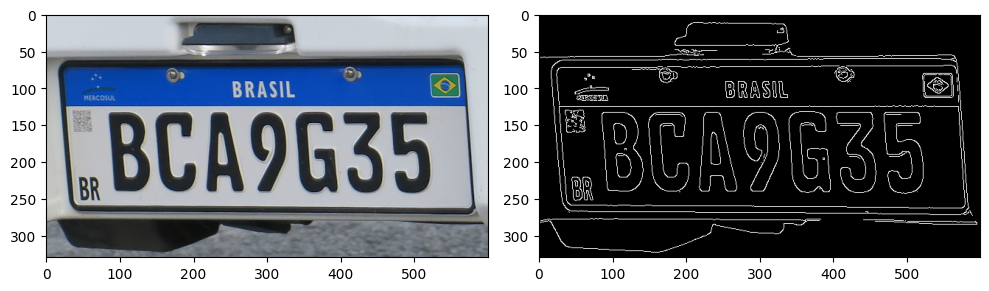

In [106]:
img = cv.cvtColor(cv.imread('/content/drive/MyDrive/CV-2023.2/list-1/license_plate.jpg'), cv.COLOR_BGR2RGB)

# filtered = cv.Canny(img, threshold1=1, threshold2=128)
# filtered = cv.Canny(img, threshold1=1, threshold2=256)
filtered = cv.Canny(img, threshold1=128, threshold2=256)
# filtered = cv.Canny(img, threshold1=256, threshold2=256)
# filtered = cv.Canny(img, threshold1=128, threshold2=256, apertureSize=5)

plot_imgs([img, filtered], as_gray=True)

## Questão 7

Escolha uma imagem interessante e gere uma pirâmide aplicando sucessivamente downsampling 3 vezes com fator 1/2. Faça o mesmo com uma pirâmide gaussiana e compare os resultados. Mostre os resultados de cada pirâmide em uma única imagem lado a lado, como no slides 20 (vai exigir algumas operações de translação de imagens). Obs.: aqui você pode usar funções do OpenCV.

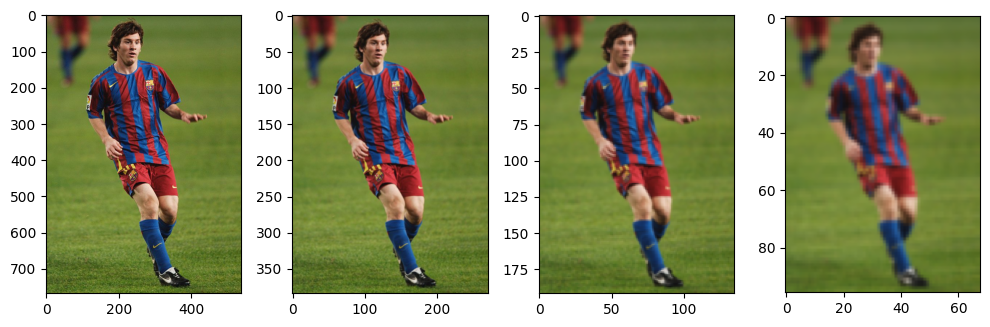

In [107]:
# Aplicando downsampling sucessivamente

read = cv.imread('/content/drive/MyDrive/CV-2023.2/list-1/messi.jpg')
img = cv.cvtColor(read, cv.COLOR_BGR2RGB)
levels = 3
pyramid = [img]

for i in range(levels):
  img = cv.pyrDown(img)
  pyramid.append(img)

plot_imgs(pyramid, columns=4)

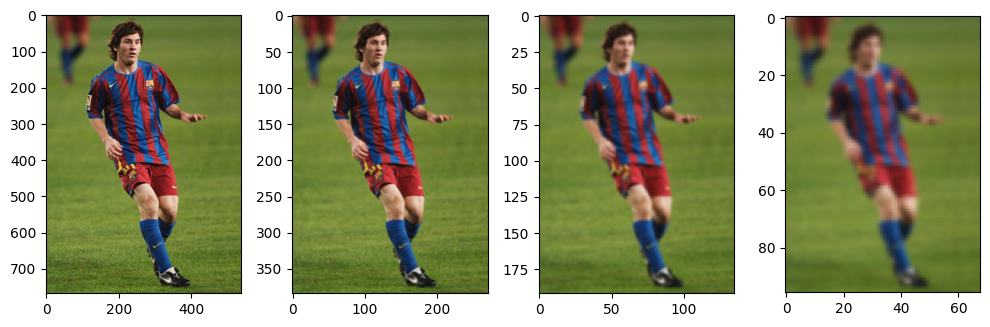

In [108]:
# Aplicando blur e downsampling sucessivamente

read = cv.imread('/content/drive/MyDrive/CV-2023.2/list-1/messi.jpg')
img = cv.cvtColor(read, cv.COLOR_BGR2RGB)
levels = 3
pyramid = [img]

for i in range(levels):
  img = cv.GaussianBlur(img, (5,5), 0)
  img = cv.pyrDown(img)
  pyramid.append(img)

plot_imgs(pyramid, columns=4)

## Questão 8

Usando a função da questão 1, crie funções que apliquem filtros para calcular as imagens representando _∂f / ∂x_, _∂f / ∂y_ e _|∇f|_. Em seguida, implemente o operador de Sobel usando estas imagens como entrada. Exiba cada um desses resultados para três imagens distintas.

In [109]:
def apply_sobel_dx(img):
  kernel = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1],
  ])
  return apply_filter(img, kernel)

def apply_sobel_dy(img):
  kernel = np.array([
    [ 1,  2,  1],
    [ 0,  0,  0],
    [-1, -2, -1],
  ])
  return apply_filter(img, kernel)

def apply_gradient(img, dx, dy):
    magnitude = np.sqrt(dx**2 + dy**2)
    return magnitude

def apply_sobel(img_path):
  img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)

  dx = apply_sobel_dx(img)
  dy = apply_sobel_dy(img)
  gradient = apply_gradient(img, dx, dy)

  plot_imgs([img, dx, dy, gradient], columns=4, as_gray=True)

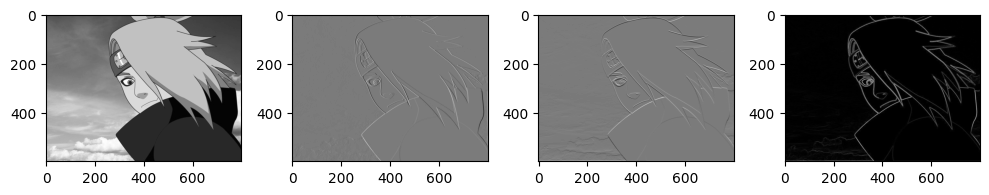

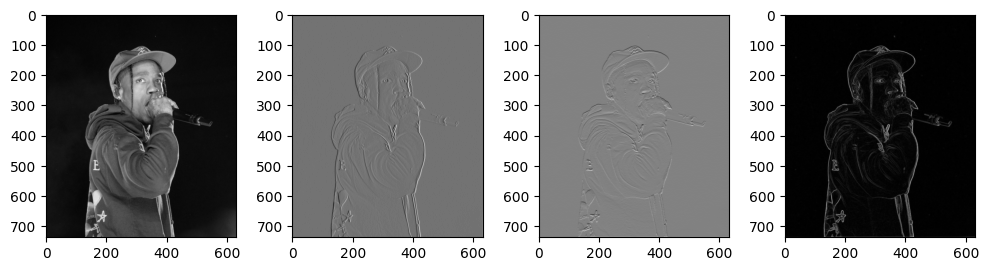

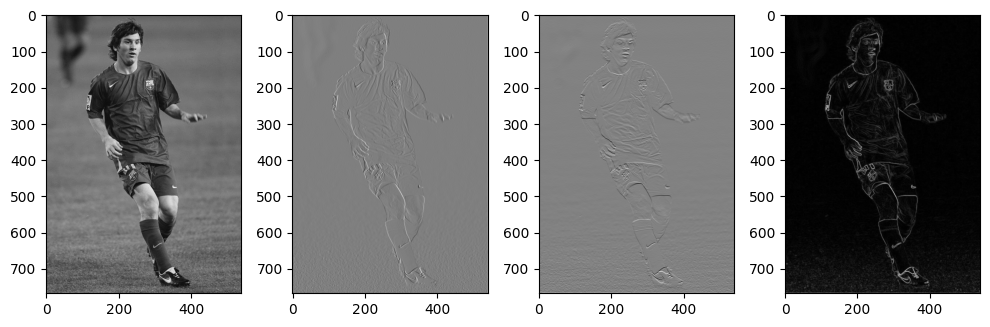

In [110]:
# Testes

apply_sobel('/content/drive/MyDrive/CV-2023.2/list-1/deidara.jpg')
apply_sobel('/content/drive/MyDrive/CV-2023.2/list-1/travis_scott.jpg')
apply_sobel('/content/drive/MyDrive/CV-2023.2/list-1/messi.jpg')